# Task 2 - Exploratory Data Analysis - Retail GRIP
# Author: Mohd Musharaf.A.Shaikh

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

Objectives:-

1.To Perform Exploratory Data Analysis.

2.Find out business problems.

3.Identify key areas for improving profits.

# Importing Libraries

In [185]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import sklearn #This lib contains all the models
import statsmodels.api as sm #will help to display data in the form of statistics

%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

In [186]:
#Importing data 
data = pd.read_csv('C:/Users/Mush/Downloads/SampleSuperstore.csv')

data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Lets check the Data type & Summary of the Data

In [187]:
print(data.shape)
print(data.describe())

(9994, 13)
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Visualizing Data

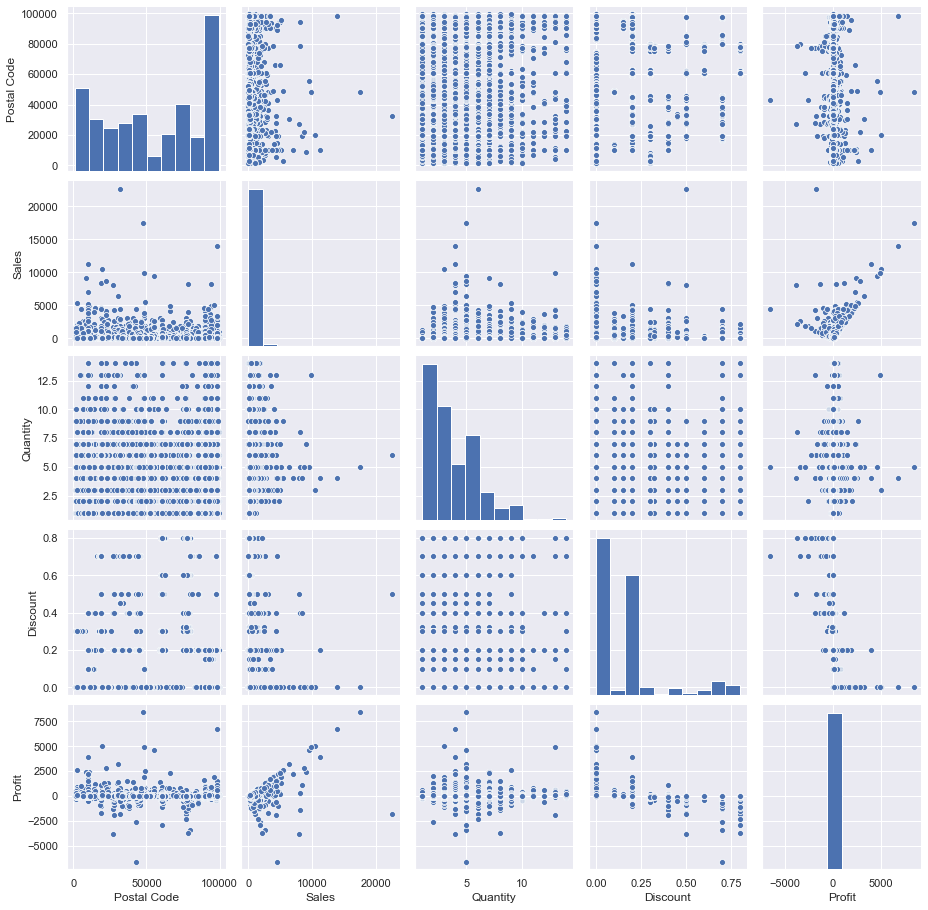

In [189]:
# Let's plot a pair plot of all numerical variables in our dataframe
sns.pairplot(data)

C:\Users\Mush\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



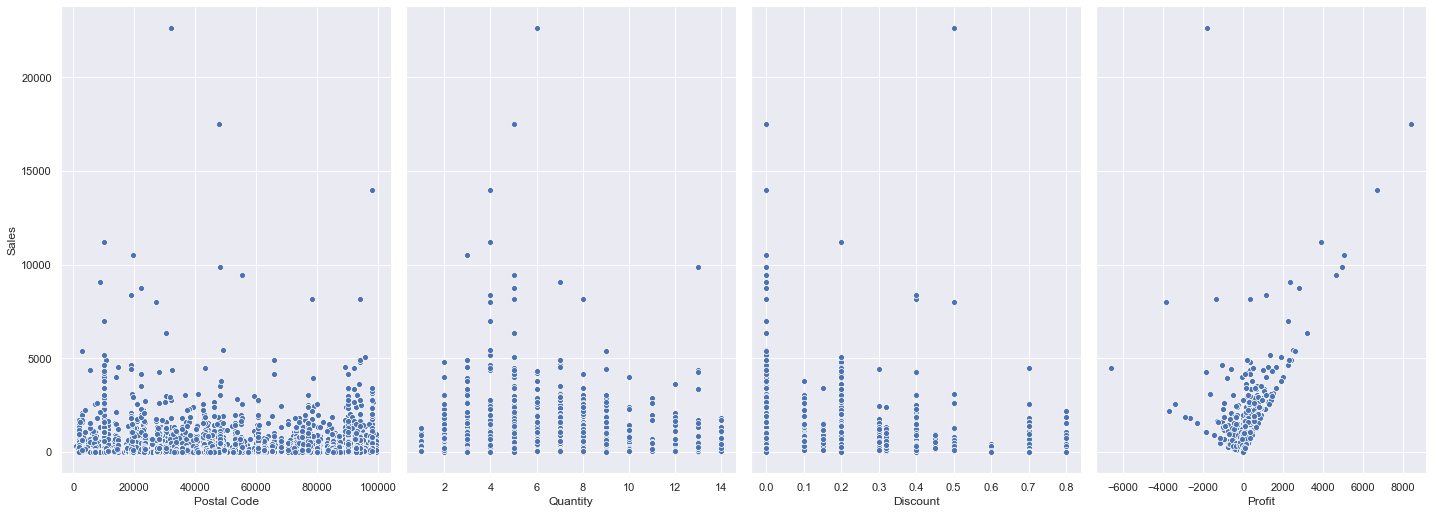

In [190]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Postal Code','Quantity','Discount','Profit'], y_vars='Sales',
             size=7, aspect=0.7, kind='scatter')

# Data Cleaning

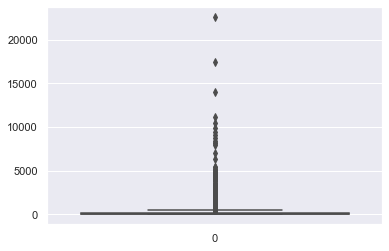

In [191]:
sns.boxplot(data=data["Sales"])

In [192]:
q1 = data['Sales'].quantile(0.25) #first quartile value
q3 = data['Sales'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

-271.71000000000004
498.93
17.28
209.94
192.66


In [193]:
#Removing Outliers
data.loc[data.Sales > 498,'Sales'] = 498
print(data.Sales)

0       261.960
1       498.000
2        14.620
3       498.000
4        22.368
         ...   
9989     25.248
9990     91.960
9991    258.576
9992     29.600
9993    243.160
Name: Sales, Length: 9994, dtype: float64


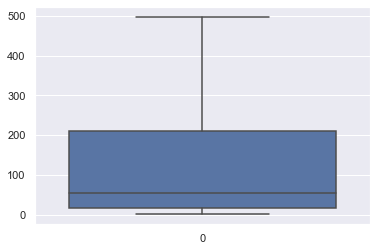

In [194]:
sns.boxplot(data=data["Sales"])

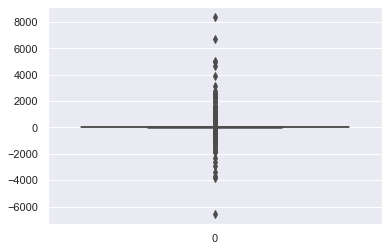

In [195]:
sns.boxplot(data=data["Profit"])

In [196]:
q1 = data['Profit'].quantile(0.25) #first quartile value
q3 = data['Profit'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

-39.724125
70.816875
1.7287500000000002
29.364
27.63525


In [197]:
#Removing of Outliers
data.loc[data.Profit > 70,'Profit'] = 70
print(data.Profit)

0        41.9136
1        70.0000
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     70.0000
Name: Profit, Length: 9994, dtype: float64


In [198]:
data.loc[data.Profit < -39,'Profit'] = -39
print(data.Profit)

0       41.9136
1       70.0000
2        6.8714
3      -39.0000
4        2.5164
         ...   
9989     4.1028
9990    15.6332
9991    19.3932
9992    13.3200
9993    70.0000
Name: Profit, Length: 9994, dtype: float64


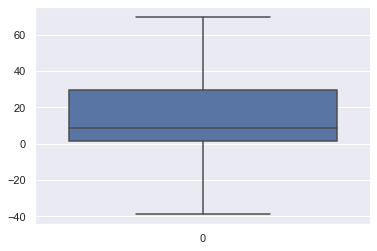

In [199]:
sns.boxplot(data=data["Profit"])

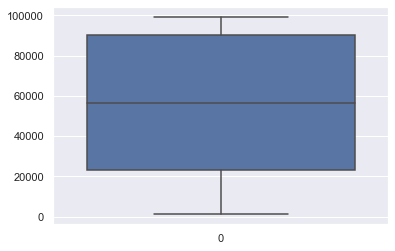

In [200]:
sns.boxplot(data=data["Postal Code"])

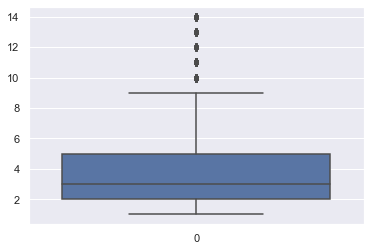

In [201]:
sns.boxplot(data=data["Quantity"])

In [202]:
q1 = data['Quantity'].quantile(0.25) #first quartile value
q3 = data['Quantity'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

-2.5
9.5
2.0
5.0
3.0


In [203]:
data.loc[data.Profit > 9.5,'Quantity'] = 709.5
print(data.Quantity)

0       709.5
1       709.5
2         2.0
3         5.0
4         2.0
        ...  
9989      3.0
9990    709.5
9991    709.5
9992    709.5
9993    709.5
Name: Quantity, Length: 9994, dtype: float64



# Data Visualization & Count Plots

<function matplotlib.pyplot.show(*args, **kw)>

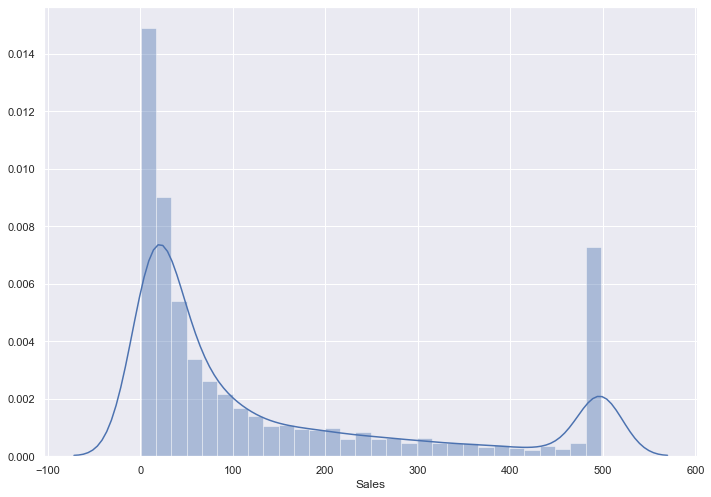

In [204]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Sales'],bins=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

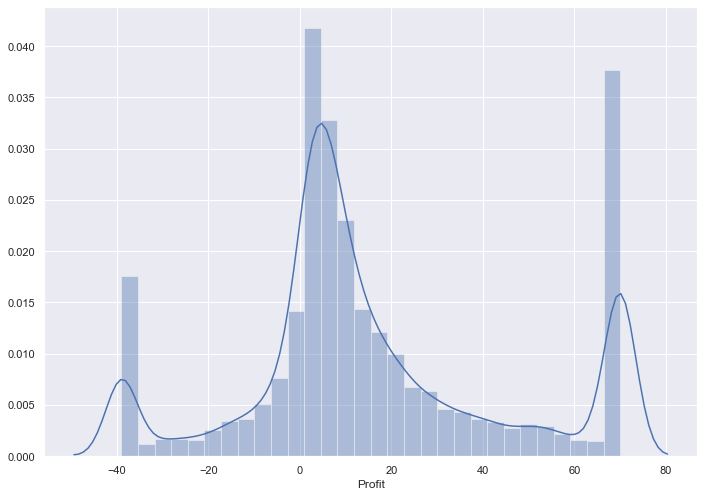

In [205]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Profit'],bins=30)
plt.show

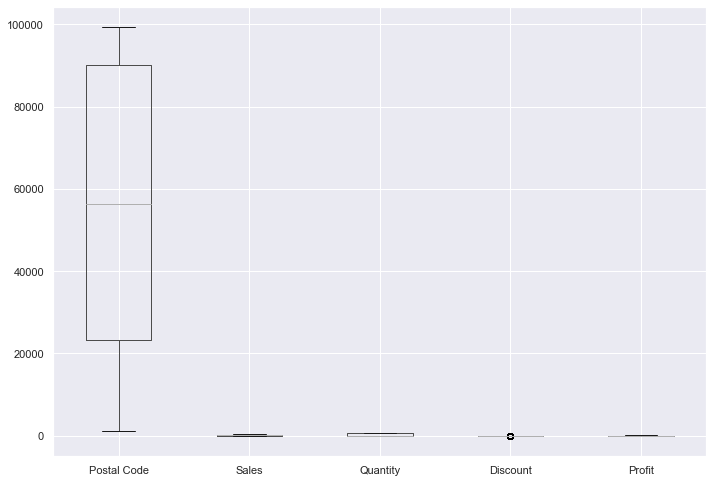

In [206]:
#Boxplot for all the data
data.boxplot()
plt.show()

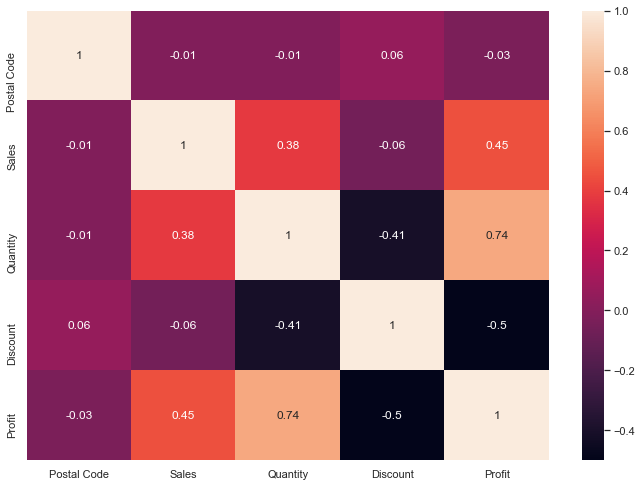

In [207]:
#Correlation Matrix
correlation_matrix = data.corr().round(2)

#annot = True to print the values inside the square
sns.heatmap(data = correlation_matrix,annot =True)


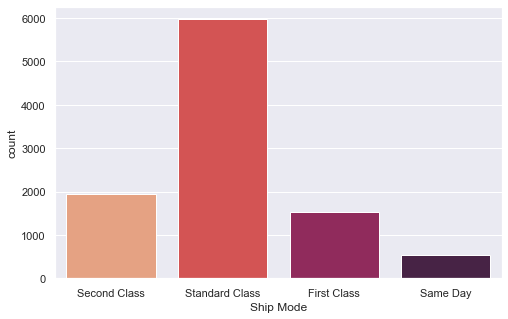

In [229]:
plt.figure(figsize =(8,5))
sns.countplot(x=data['Ship Mode'],palette='rocket_r')

Standard Class has the highest value here.

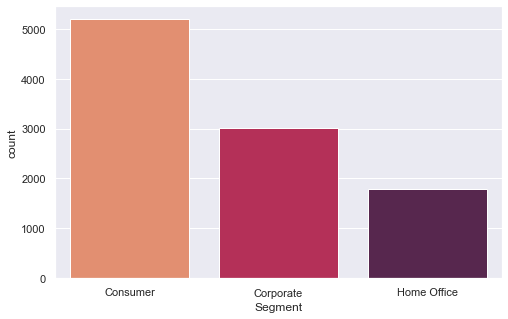

In [230]:
plt.figure(figsize =(8,5))
sns.countplot(x=data['Segment'],palette='rocket_r')

Consumer has the highest value here.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

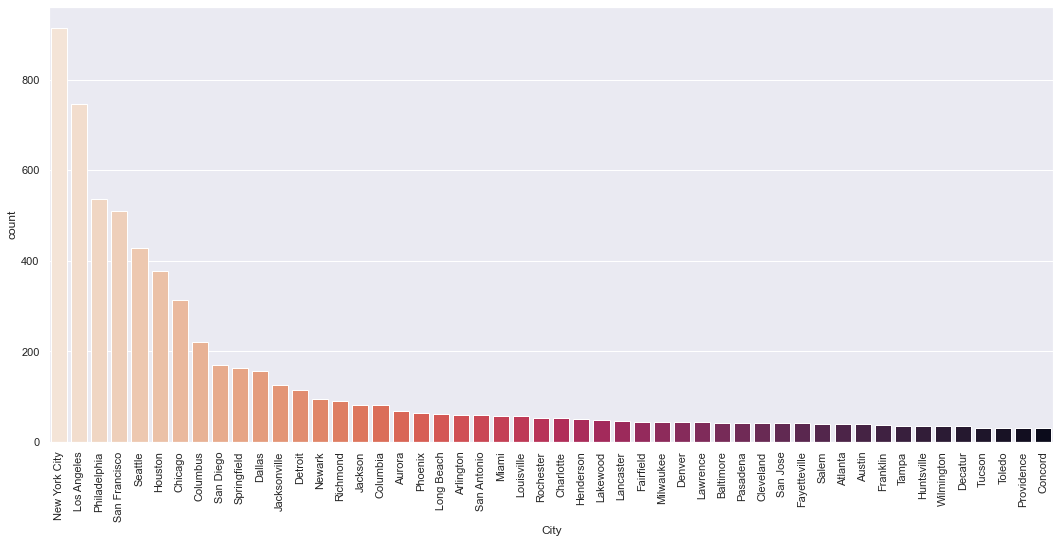

In [232]:
plt.figure(figsize =(18,8))
sns.countplot(x=data['City'], order=data['City'].value_counts().head(50).index,palette='rocket_r')
plt.xticks(rotation = 90)

Here New York has the highest amount among other cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

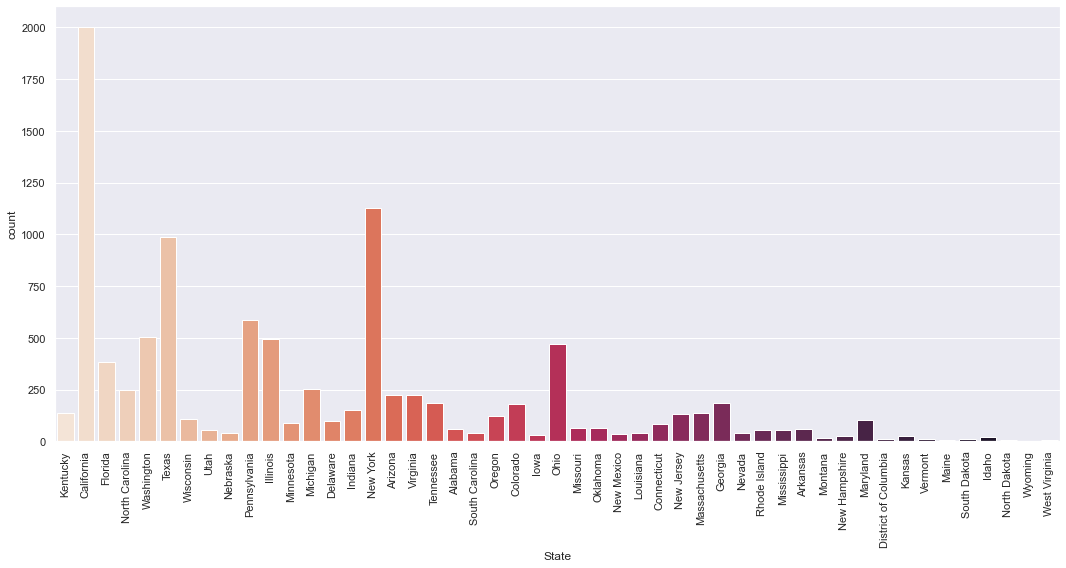

In [231]:
plt.figure(figsize =(18,8))
sns.countplot(x=data['State'],palette='rocket_r')
plt.xticks(rotation = 90)

We can see here California has the highest amount than any other States.

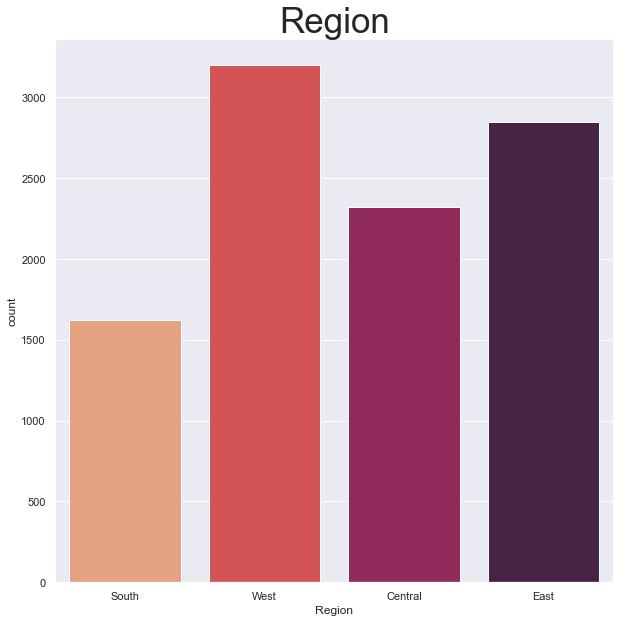

In [219]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Region"], palette='rocket_r')

plt.title('Region',fontsize=35)
plt.show()

Here West Region has the highest value

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

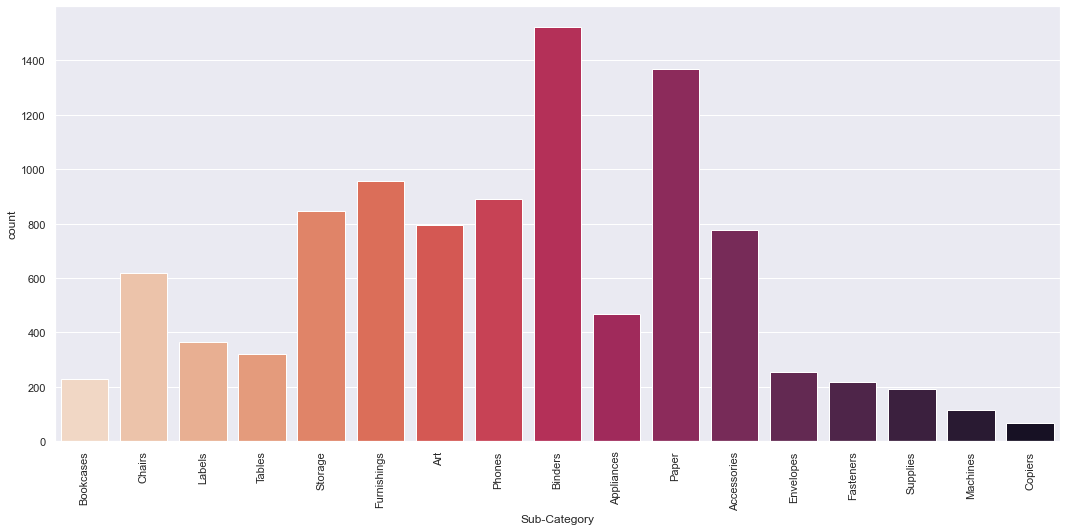

In [228]:
plt.figure(figsize =(18,8))
sns.countplot(x=data['Sub-Category'], palette='rocket_r')
plt.xticks(rotation = 90)

# Pairplot for all Data

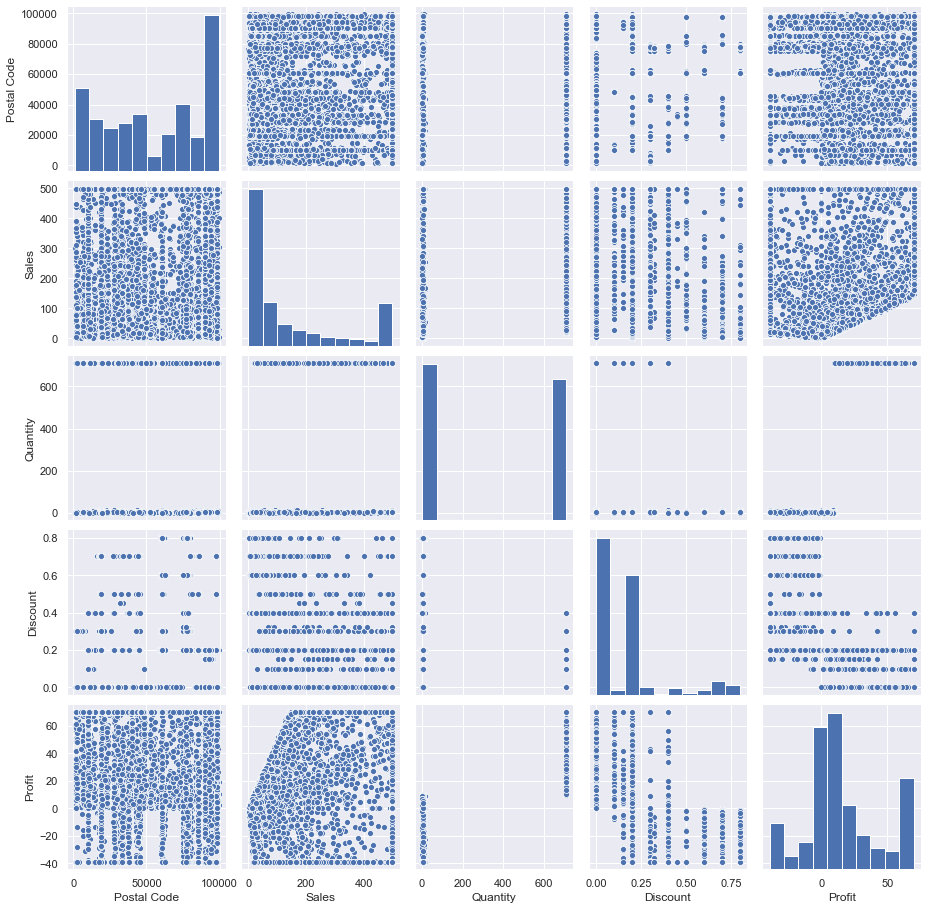

In [220]:
sns.pairplot(data)

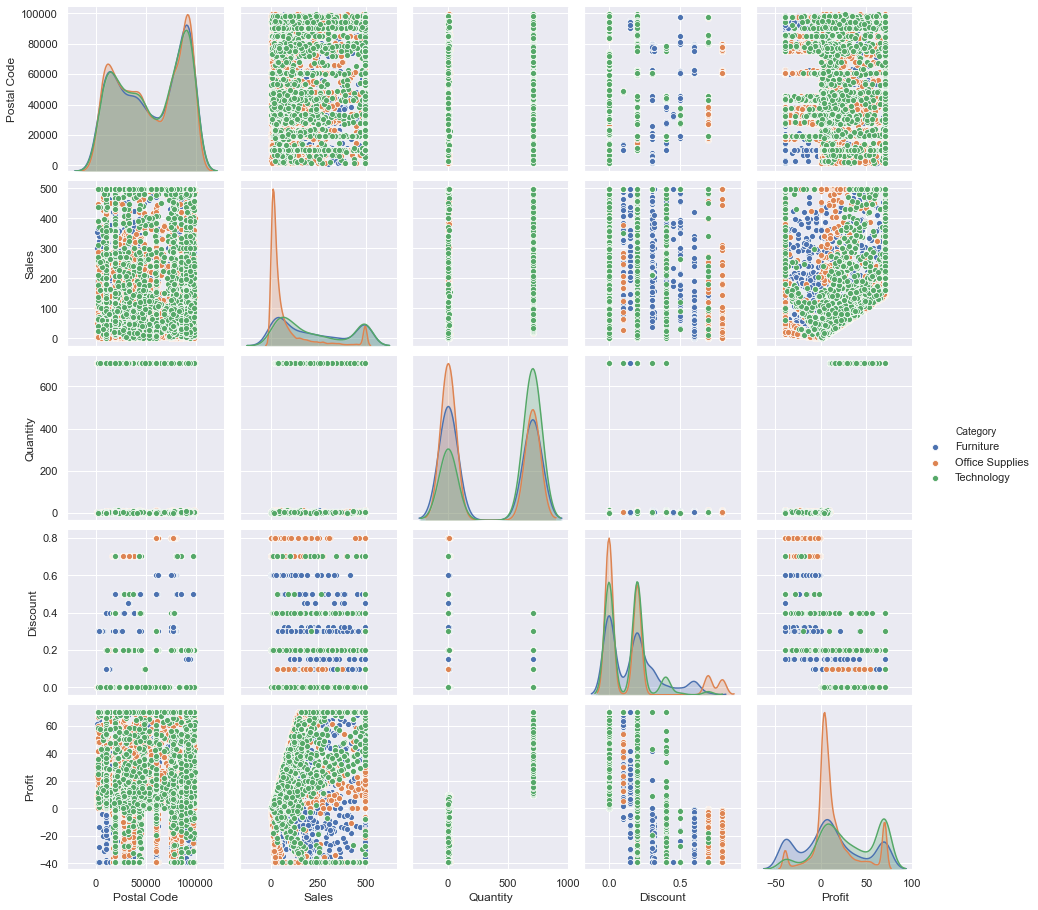

In [223]:
sns.pairplot(data, hue='Category')

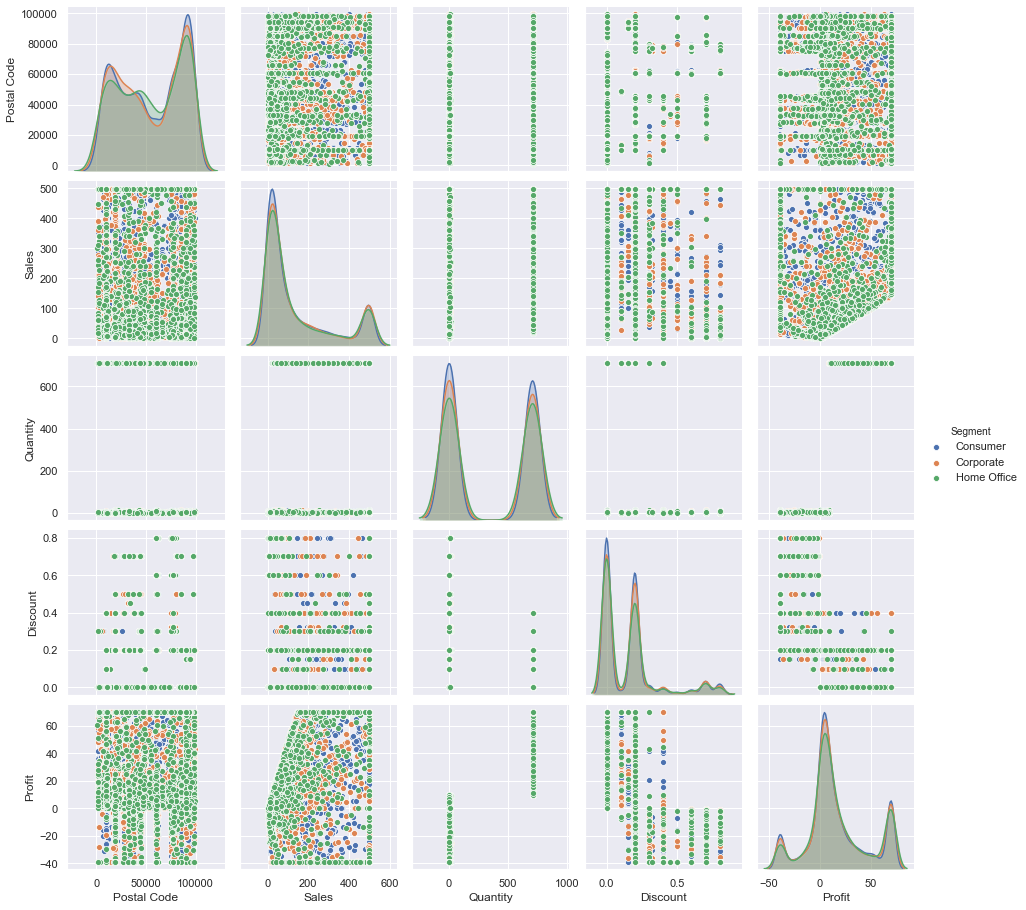

In [225]:
sns.pairplot(data, hue='Segment')

# Bar Plots focusing on Sales,Profit w.r.t Category & Sales

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

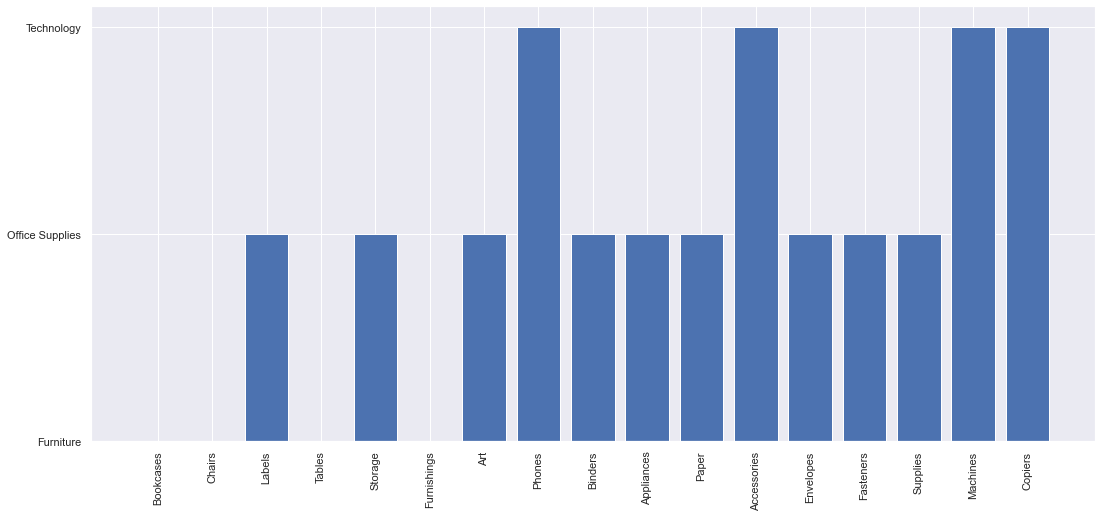

In [211]:
#Barplot of Sub-Category vs Category
plt.figure(figsize =(18,8))
plt.bar('Sub-Category','Category', data=data)
plt.xticks(rotation = 90)

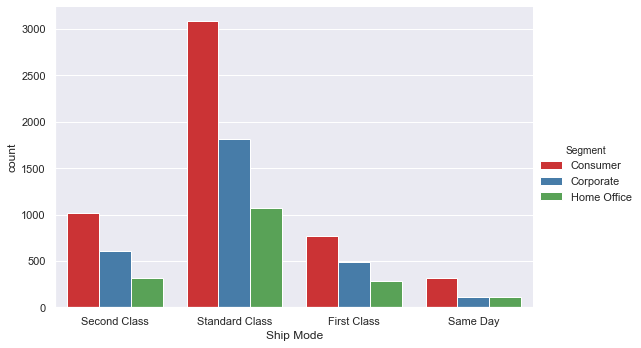

In [173]:
sns.catplot('Ship Mode',hue='Segment',data=data, kind='count',aspect=1.5 ,palette='Set1')

In [233]:
#Country-wise analysis of quantity, sales, discount and profit
data['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [234]:
data_state=data.groupby(['State'])[['Quantity','Sales','Discount','Profit']].mean()
data_state.head(10)

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,454.778689,178.395902,0.000000,31.231690
Arizona,224.200893,129.076558,0.303571,3.581166
Arkansas,462.441667,146.403833,0.000000,32.621805
California,419.280610,146.926406,0.072764,22.285199
Colorado,193.629121,132.760236,0.316484,3.214608
Connecticut,424.932927,132.551549,0.007317,25.656911
Delaware,444.604167,135.980719,0.006250,29.281514
District of Columbia,426.700000,121.357000,0.000000,23.414440
Florida,200.633159,125.356328,0.299347,5.160717


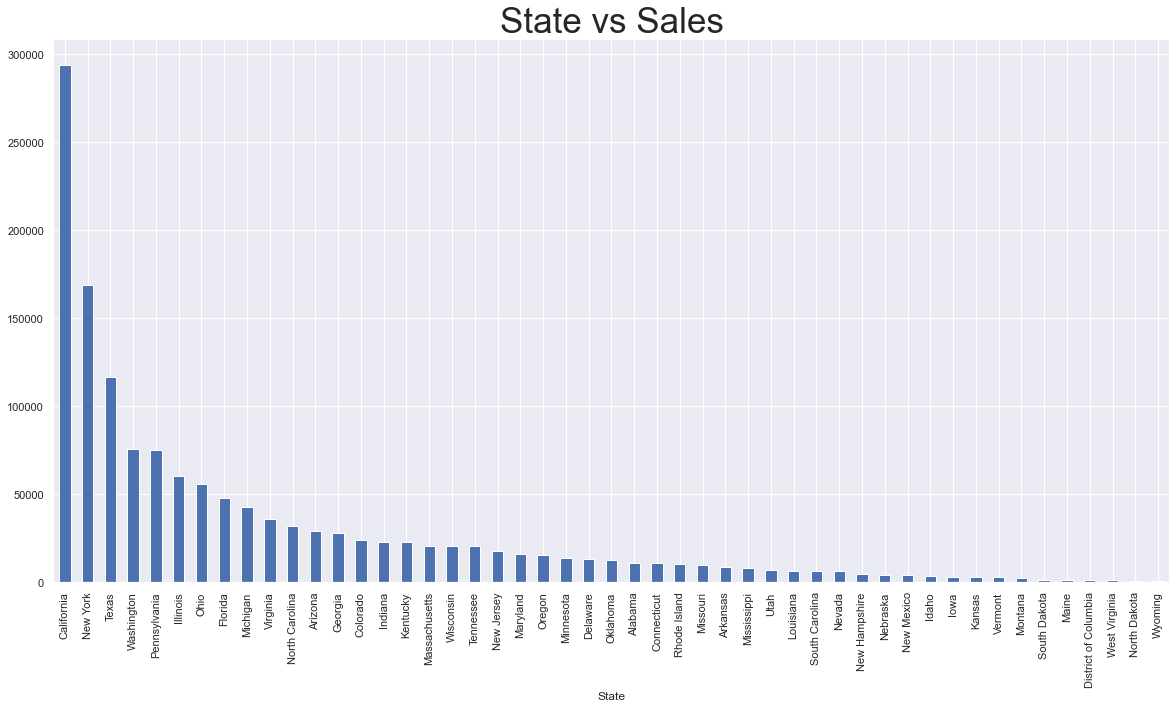

In [237]:
# statewise graph plot
state=data.groupby(['State'])['Sales'].sum()
state.sort_values(ascending=False,inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title('State vs Sales',fontsize=35)

state.plot.bar()

C:\Users\Mush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



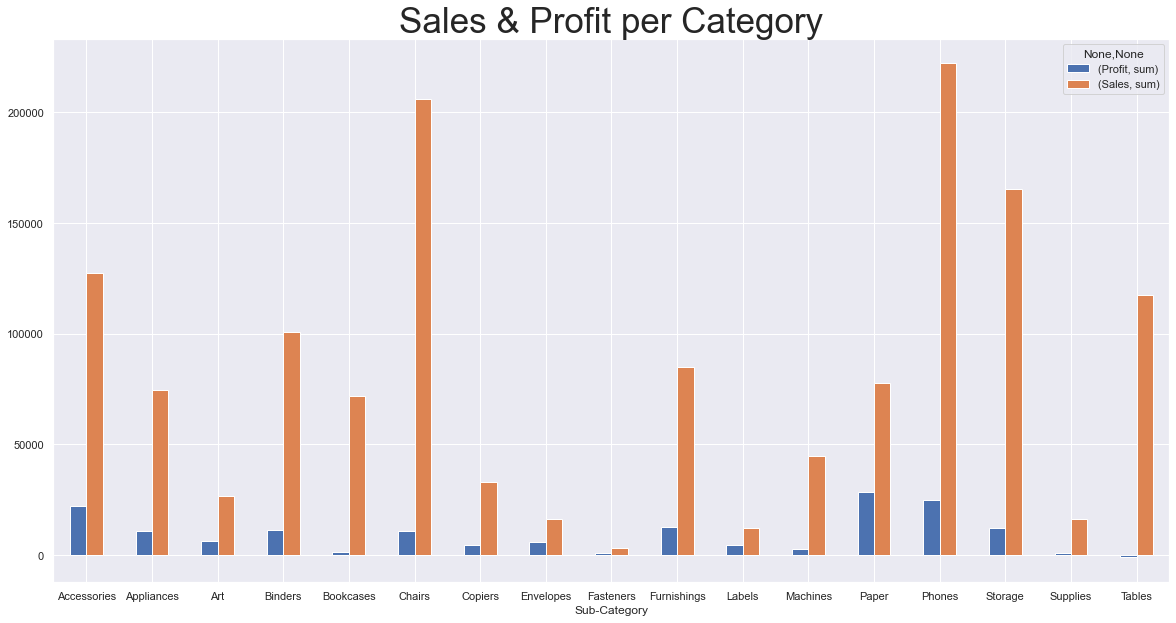

In [241]:
sales_profit=data.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
sales_profit.plot.bar(rot=0,figsize=(20,10))

plt.title('Sales & Profit per Category',fontsize=35)
plt.show(block=True)

# Conclusions:
1.Technology has the highest sales among any other categories

2.State with the highest amount of sales is California followed by New York, Texas, and so on.

3.We also conclude if we give more discounts on products our sales increases but profit get low comparetively

4.Overall each segment is profitable.

5.Furniture category is the only loss making sector that to in central region.

6.Copier has maximum amount of profit and chair has the maximum amount of sales